In [34]:
import rasterio
import os
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

In [18]:
dem_dir = os.path.join("/""Users", "mattw", "Desktop", "projects",
                        "GlacierView","gee-pull","data", "joined_dems",
                        "dems", "G007026E45991N_NASADEM.tif")

In [19]:
# with rasterio.open(file_dir) as f:
#     landsat_img = f.read()

In [20]:
with rasterio.open(file_dir) as f:
    dem_img = f.read()

In [21]:
print(f"Landsat shape: {landsat_img.shape}", "\n", f"DEM shape:{dem_img.shape}")

Landsat shape: (3, 174, 142) 
 DEM shape:(3, 174, 142)


In [22]:
DST_CRS = 'EPSG:4326'

# with rasterio.open("/Users/mattw/Desktop/projects/gee-pull/G000000000000N/G000000000000N_19900113_Landsat5.tif") as src:
#     transform, width, height = calculate_default_transform(
#         src.crs, DST_CRS, src.width, src.height, *src.bounds)
#     kwargs = src.meta.copy()
#     kwargs.update({
#         'crs': DST_CRS,
#         'transform': transform,
#         'width': width,
#         'height': height
#     })

#     with rasterio.open("new.tif", 'w', **kwargs) as dst:
#         for i in range(1, src.count + 1):
#             reproject(
#                 source=rasterio.band(src, i),
#                 destination=rasterio.band(dst, i),
#                 src_transform=src.transform,
#                 src_crs=src.crs,
#                 dst_transform=transform,
#                 dst_crs=DST_CRS,
#                 resampling=Resampling.nearest)
            

with rasterio.open(dem_dir) as src:
    transform, width, height = calculate_default_transform(
        src.crs, DST_CRS, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': DST_CRS,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open("new_dem.tif", 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=DST_CRS,
                resampling=Resampling.nearest)

In [24]:
with rasterio.open("/Users/mattw/Desktop/projects/gee-pull/new.tif") as f:
    landsat_reprojected_img = f.read()

RasterioIOError: /Users/mattw/Desktop/projects/gee-pull/new.tif: No such file or directory

In [26]:
with rasterio.open("/Users/mattw/Desktop/projects/GlacierView/gee-pull/new_dem.tif") as f:
    dem_reprojected_img = f.read()

My research suggests different shapes because of slight variations in resolution. For example, some Landsat images may be at 30m while others are at 29m. 

In [27]:
print(f"Landsat shape: {landsat_img.shape}", "\n",
      f"Reprojected Landsat shape: {landsat_reprojected_img.shape}", "\n", 
      f"DEM shape:{dem_img.shape}", "\n",
      f"Reprojected DEM shape: {dem_reprojected_img.shape}")

NameError: name 'landsat_reprojected_img' is not defined

In [65]:
dem = np.rollaxis(dem_reprojected_img,0,3)
dem = np.where(dem < 500,1750,dem)

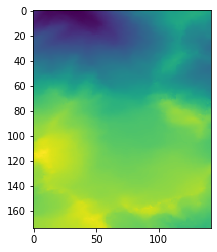

In [73]:
plt.imshow(dem[:,:,0])

(array([[ 6., 12., 14., ..., 33., 57., 10.],
        [ 8., 10., 14., ..., 33., 54., 14.],
        [ 9.,  9., 15., ..., 31., 53., 17.],
        ...,
        [ 0.,  0.,  0., ..., 62., 24.,  0.],
        [ 0.,  0.,  0., ..., 63., 24.,  0.],
        [ 0.,  0.,  0., ..., 68., 19.,  0.]]),
 array([1740., 1916., 2092., 2268., 2444., 2620., 2796., 2972., 3148.,
        3324., 3500.]),
 <a list of 142 BarContainer objects>)

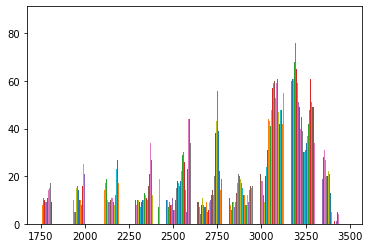

In [69]:
plt.hist(dem[:,:,0])